# AuTextification

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from py3langid.langid import LanguageIdentifier, MODEL_FILE
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

import warnings

# Suppress FutureWarning related to is_sparse
warnings.filterwarnings("ignore", category=FutureWarning)

Skip the preprocess (faster)

In [2]:
root = './data/competition_2024/preprocessed_data_subtask1/'

train_en_preprocessed = pd.read_csv(root+'train_en_preprocessed.csv')
train_es_preprocessed = pd.read_csv(root+'train_es_preprocessed.csv')
train_ca_preprocessed = pd.read_csv(root+'train_ca_preprocessed.csv')
train_pt_preprocessed = pd.read_csv(root+'train_pt_preprocessed.csv')
train_eu_preprocessed = pd.read_csv(root+'train_eu_preprocessed.csv')
train_gl_preprocessed = pd.read_csv(root+'train_gl_preprocessed.csv')

train_preprocessed = pd.read_csv(root+'train_preprocessed.csv')

# Preprocess

## Data

In [3]:
train = pd.read_csv('C:/Users/34686/3CD - 23_24/PROY III/autextification/data_24/subtask1.csv').drop(columns='Unnamed: 0')

train.head()

,id,text,label
0,15442,Es un tribunal de suprema instanza que forma p...,generated
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human
2,12777,Doug mcadam es un científico estadista estadou...,generated
3,63467,"El president de la generalitat, carles puigdem...",generated
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated


## Identifying languages

In [4]:
identifier = LanguageIdentifier.from_pickled_model(MODEL_FILE)
identifier.set_languages(['en', 'es', 'pt', 'gl', 'eu', 'ca'])

# English (en)
# Spanish (es)
# Portuguese (pt)
# Galician (gl)
# Basque (eu)
# Catalan (ca)

identifier.classify(train.loc[0, 'text'])

('ca', -4691.1987)

In [5]:
def detect_language(text):
    return identifier.classify(text)[0]

# Create the new column
train['detected_language'] = train['text'].apply(detect_language)

train

,id,text,label,detected_language
0,15442,Es un tribunal de suprema instanza que forma p...,generated,ca
1,26409,Aixó de tindrer la platgeta tant prou era un p...,human,ca
2,12777,Doug mcadam es un científico estadista estadou...,generated,es
3,63467,"El president de la generalitat, carles puigdem...",generated,ca
4,41050,"Traídas de francia, tan estrafalarias que una ...",generated,es
...,...,...,...,...
109658,76637,"Bere burua egokitzen saiatu zuen, aurreko mome...",generated,eu
109659,107183,"Benquerida compañeira e amiga, para nós é moi ...",human,gl
109660,144741,"The irish president has signed the ""long-await...",generated,en
109661,1202,"Pedro de alvarado y contreras ""tonatiuh"" (bada...",human,es


In [6]:
train['label'].value_counts()

label
generated    58754
human        50909
Name: count, dtype: int64

In [7]:
train['detected_language'].value_counts()

detected_language
en    25954
es    22535
pt    19733
ca    16372
eu    13444
gl    11625
Name: count, dtype: int64

In [8]:
train_en = train[train['detected_language'] == 'en']
train_es = train[train['detected_language'] == 'es']
train_pt = train[train['detected_language'] == 'pt']
train_gl = train[train['detected_language'] == 'gl']
train_eu = train[train['detected_language'] == 'eu']
train_ca = train[train['detected_language'] == 'ca']

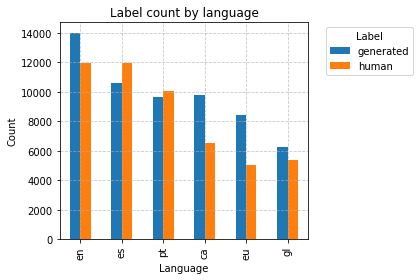

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

train_grouped = train.groupby('detected_language')['label'].value_counts().unstack().fillna(0)
train_grouped = train_grouped.loc[train_grouped.sum(axis=1).sort_values(ascending=False).index]

ax = train_grouped.plot(kind='bar', stacked=False)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Label count by language')
plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.tight_layout()                         # Adding style
plt.show()

In [10]:
## Checking the identifier

# Dictionary to store samples for each language
samples_by_language = {}

# Number of samples per language
samples_per_language = 10

# Iterate over each language and select random samples
for language in train['detected_language'].unique():
    language_samples = train[train['detected_language'] == language].sample(samples_per_language)
    samples_by_language[language] = language_samples

# Concatenate the sampled dataframes
sample_df = pd.concat(samples_by_language.values())

sample_df

,id,text,label,detected_language
77275,144318,"Encara que no he tingut l""oportunitat de visit...",generated,ca
16079,132075,"Per què m""és tolt poder delliberar els sentime...",generated,ca
4485,144064,El teatre noruec de christiania (en noruec: kr...,human,ca
28482,125292,Maria de hessen-kassel (reina de dinamarca) (1...,human,ca
17506,150785,"El que més m""ha agradat d""aquest lloc són els ...",generated,ca
85918,33228,"Al voltant del foc, els nens ballen i riuen, e...",generated,ca
71682,60185,La catalogació del conjunt arqueològic de la c...,generated,ca
99002,142024,"En la cort de saragossa, on ressonen els passo...",generated,ca
75165,100247,Els bombers de barcelona han evacuat aquest di...,human,ca
1833,8251,Un estudi ha demostrat que els nens de tres an...,human,ca


## Preprocess data

In [14]:
with open('./data/stop words/stopwords_galician.txt', 'r') as file:
    stopwords_galician_1 = [line.strip() for line in file.readlines()]
    stopwords_galician_1 = set(stopwords_galician_1)


In [15]:
# https://github.com/stopwords-iso/stopwords-gl/blob/master/stopwords-gl.txt
with open('data/stop words/stopwords-gl.txt', 'r') as file:
    stopwords_galician_2 = [line.strip() for line in file.readlines()]
    stopwords_galician_2 = set(stopwords_galician_2)

In [16]:
stopwords_galician = stopwords_galician_1|stopwords_galician_2

In [17]:
import string
from nltk.corpus import stopwords

# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

 

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = set()
    # Galician stop words --> https://github.com/Xangis/extra-stopwords/blob/master/galician
    for lan in ['english', 'catalan', 'spanish', 'basque', 'portuguese']:
        STOPWORDS = STOPWORDS|set(stopwords.words(lan))|stopwords_galician
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostop =  ' '.join([word.lower() for word in nopunc.split() if word.lower() not in STOPWORDS and word.isalnum()])
    
    # choose some words to be stemmed
#     ps = PorterStemmer()
#     stem  =  ' '.join([ps.stem(word) for word in nostop.split()])
    return nostop

# import nltk 
# nltk.download('stopwords') # # -> do this in case of 'Resource stopwords not found.'


def preprocessing(df):
    # processing text
    df.loc[:, 'clean_text'] = df['text'].apply(text_process)

    # calculate text length
    df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)
    
    # crop unnecessary columns
    df = df.drop(columns=['text', 'detected_language'])

    # map labels
    df['label'] = df['label'].map({'human': 0, 'generated': 1})

    return df

In [18]:
train_en_preprocessed = preprocessing(train_en)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [19]:
train_es_preprocessed = preprocessing(train_es)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [20]:
train_pt_preprocessed = preprocessing(train_pt)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [21]:
train_ca_preprocessed = preprocessing(train_ca)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [22]:
train_eu_preprocessed = preprocessing(train_eu)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [23]:
train_gl_preprocessed = preprocessing(train_gl)

<ipython-input-17-6724642463e6>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'clean_text'] = df['text'].apply(text_process)
<ipython-input-17-6724642463e6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'text_len'] = df.loc[:, 'clean_text'].apply(len)


In [24]:
train_preprocessed = preprocessing(train)
train_preprocessed

,id,label,clean_text,text_len
0,15442,1,tribunal suprema instanza forma part jurisdicc...,1016
1,26409,0,aixó tindrer platgeta prou privilegi tenieu du...,50
2,12777,1,doug mcadam científico estadista estadounidens...,836
3,63467,1,president generalitat carles puigdemont vicepr...,1107
4,41050,1,traídas francia estrafalarias ejemplo entretej...,281
...,...,...,...,...
109658,76637,1,burua egokitzen saiatu aurreko momentuen gorab...,988
109659,107183,0,benquerida compañeira amiga importante coma co...,170
109660,144741,1,irish president signed longawaiting mother bab...,1545
109661,1202,0,pedro alvarado contreras tonatiuh badajoz extr...,1773


In [25]:
root = './data/competition_2024/preprocessed_data_subtask1/'

# train_en_preprocessed.to_csv(root+'train_en_preprocessed.csv')
# train_es_preprocessed.to_csv(root+'train_es_preprocessed.csv')
# train_ca_preprocessed.to_csv(root+'train_ca_preprocessed.csv')
# train_pt_preprocessed.to_csv(root+'train_pt_preprocessed.csv')
# train_eu_preprocessed.to_csv(root+'train_eu_preprocessed.csv')
# train_gl_preprocessed.to_csv(root+'train_gl_preprocessed.csv')

# train_preprocessed.to_csv(root+'train_preprocessed.csv')


## Exploration

In [28]:

def plot_length(corpus, lan):
    
    plt.figure(figsize=(12, 8))

    corpus[corpus.label == 0].text_len.plot(bins=35, kind='hist', color='blue', 
                                           label='Human texts', alpha=0.5)
    corpus[corpus.label == 1].text_len.plot(bins=35, kind='hist', color='red', 
                                           label='Generated texts', alpha=0.5)
    plt.xlabel("Message Length")
    plt.title(f'Texts length for {lan} language')
    plt.legend(title='Texts', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.savefig(f'Texts length for {lan} language.png')

    plt.show()
    print(f"{lan} -> Average Human text length: {corpus[corpus.label == 0]['text_len'].mean()}")
    print(f"{lan} -> Average Computer text length: {corpus[corpus.label == 1]['text_len'].mean()}")
    print()
    


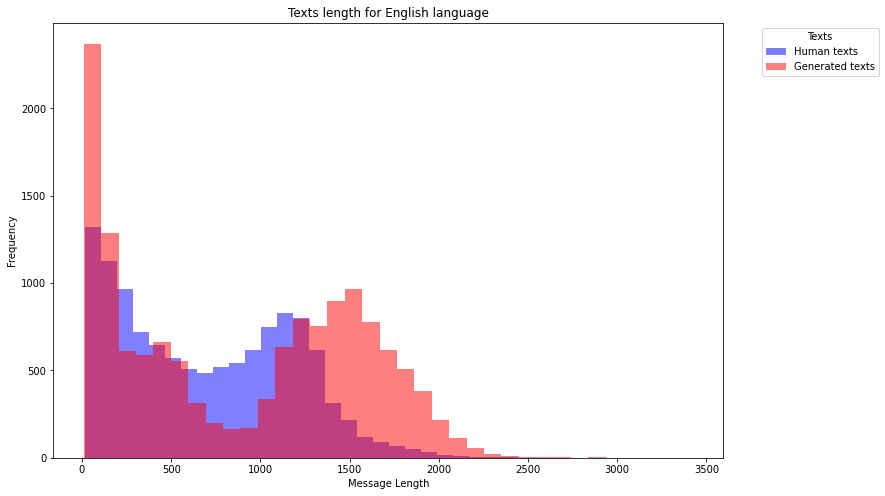

English -> Average Human text length: 700.3925758337523
English -> Average Computer text length: 900.6996433666192



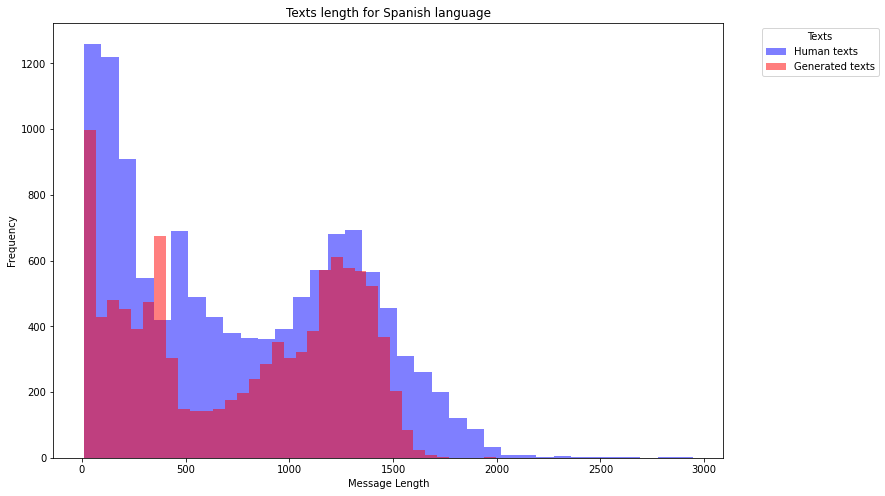

Spanish -> Average Human text length: 757.7721338912133
Spanish -> Average Computer text length: 761.147472838923



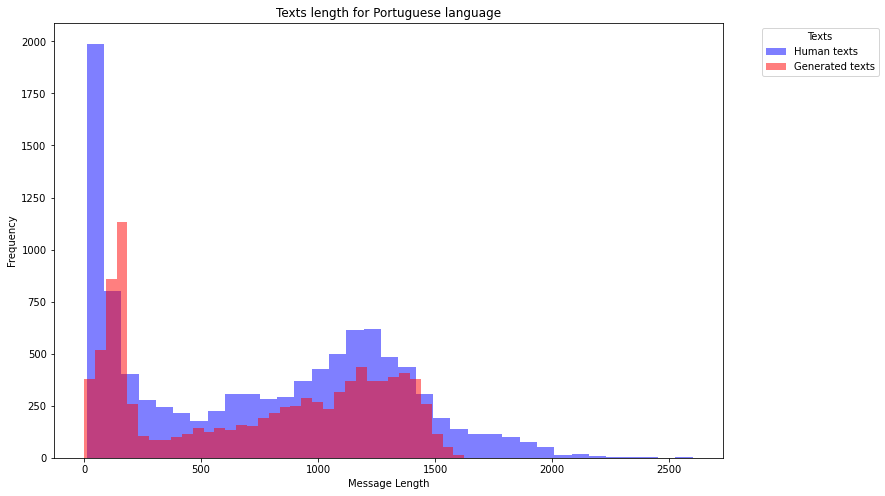

Portuguese -> Average Human text length: 745.4653396712221
Portuguese -> Average Computer text length: 734.2159833938765



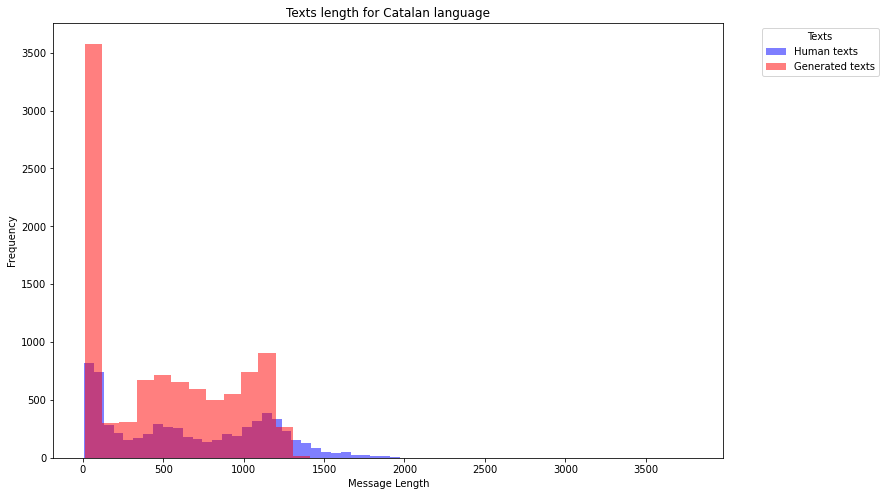

Catalan -> Average Human text length: 652.2971036585366
Catalan -> Average Computer text length: 495.3380554423155



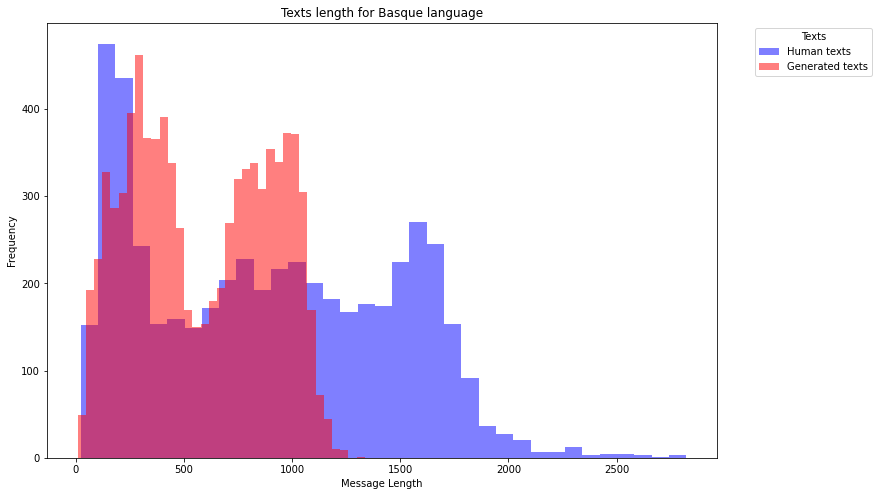

Basque -> Average Human text length: 895.1647058823529
Basque -> Average Computer text length: 581.4135721912445



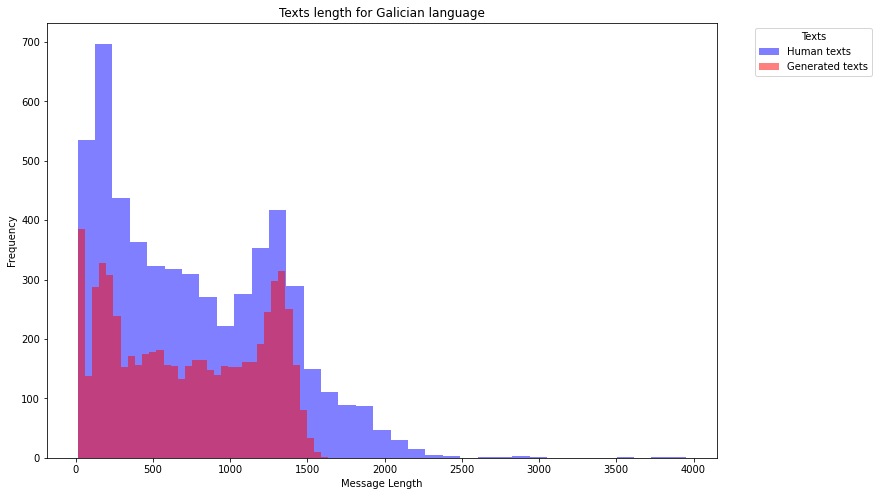

Galician -> Average Human text length: 771.2608370702541
Galician -> Average Computer text length: 721.8810776343057



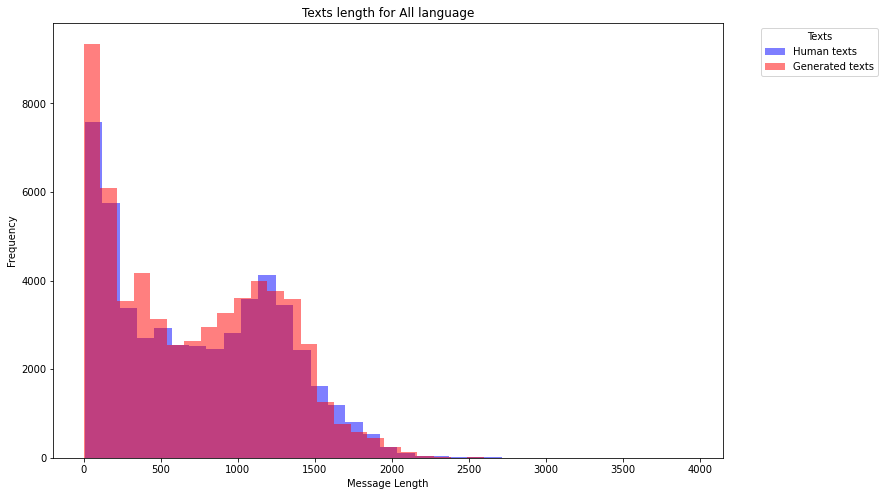

All -> Average Human text length: 743.2414504311615
All -> Average Computer text length: 715.6632399496204



In [29]:
train = [(train_en_preprocessed, 'English'), (train_es_preprocessed, 'Spanish'), (train_pt_preprocessed, 'Portuguese'),
        (train_ca_preprocessed, 'Catalan'), (train_eu_preprocessed, 'Basque'), (train_gl_preprocessed, 'Galician'),
        (train_preprocessed, 'All')]

for train_data, lan in train:
    plot_length(train_data, lan)

In [30]:
def plot_common_words(corpus, type, lan):
    if type=='human':
        words = corpus[corpus.label == 0]['clean_text'].apply(lambda x: x.split())
    elif lan=='Portuguese' and type!='human':
#         w = corpus[corpus.label==1].clean_text.to_list()
#         words = []

#         for line in w:
#             if type(line)!=float and type(line)!=str:
#                 for x in line.split():
#                     words.append(x)
        return
    else:
        words = corpus[corpus.label == 1]['clean_text'].apply(lambda x: x.split())
    

    ham_words= Counter()
    for msg in words:
        ham_words.update(msg)
        
    print(ham_words.most_common(50))
        
    common_words = [word[0] for word in ham_words.most_common(20)]
    word_counts = [word[1] for word in ham_words.most_common(20)]
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(common_words, word_counts, color='skyblue')
    plt.title(f'Top 20 Most Common Words in {type} {lan} texts Labeled Data')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

[('said', 10415), ('would', 5365), ('one', 5351), ('mr', 3904), ('also', 3593), ('people', 3499), ('first', 3253), ('time', 3058), ('could', 2988), ('new', 2884), ('like', 2871), ('two', 2746), ('well', 2312), ('see', 2218), ('made', 2171), ('years', 2143), ('good', 2106), ('may', 2075), ('much', 1938), ('know', 1853), ('last', 1807), ('book', 1797), ('year', 1791), ('many', 1748), ('little', 1720), ('man', 1717), ('say', 1683), ('great', 1666), ('get', 1645), ('come', 1609), ('work', 1588), ('go', 1579), ('make', 1576), ('back', 1540), ('dont', 1539), ('never', 1512), ('way', 1498), ('told', 1495), ('government', 1492), ('day', 1485), ('life', 1478), ('think', 1468), ('found', 1420), ('three', 1406), ('world', 1405), ('since', 1393), ('take', 1388), ('part', 1372), ('must', 1329), ('long', 1313)]


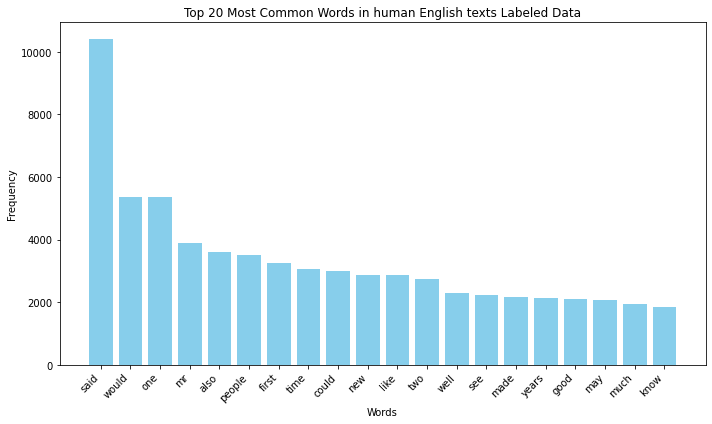

[('also', 9429), ('said', 7367), ('one', 6012), ('would', 5611), ('new', 4685), ('could', 4208), ('time', 4119), ('including', 3603), ('made', 3561), ('people', 3482), ('many', 3399), ('help', 3299), ('life', 3269), ('however', 3231), ('like', 3223), ('known', 3197), ('man', 3158), ('first', 3061), ('world', 3044), ('work', 2983), ('mr', 2772), ('found', 2766), ('years', 2709), ('way', 2686), ('government', 2638), ('several', 2555), ('see', 2510), ('make', 2508), ('couldnt', 2497), ('eyes', 2476), ('local', 2475), ('significant', 2446), ('two', 2437), ('back', 2390), ('home', 2268), ('family', 2194), ('may', 2181), ('despite', 2175), ('city', 2157), ('knew', 2145), ('around', 2145), ('take', 2138), ('community', 2120), ('come', 2095), ('well', 2067), ('day', 2020), ('place', 2017), ('young', 2005), ('face', 1999), ('voice', 1913)]


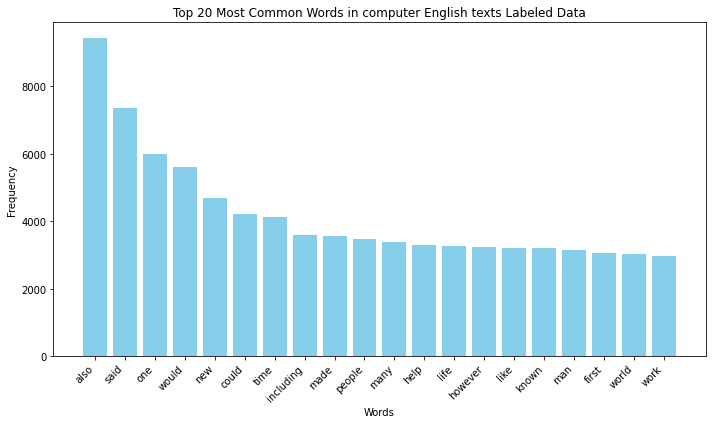

[('años', 3550), ('dijo', 2859), ('hotel', 2561), ('vez', 2468), ('después', 2344), ('mundo', 2264), ('final', 2219), ('así', 2078), ('parte', 2069), ('siempre', 1866), ('tiempo', 1831), ('año', 1794), ('solo', 1729), ('ahora', 1701), ('mejor', 1696), ('personas', 1694), ('país', 1680), ('quizás', 1679), ('puede', 1672), ('vida', 1672), ('primera', 1667), ('día', 1635), ('lugar', 1622), ('según', 1622), ('gran', 1621), ('servicio', 1600), ('mismo', 1561), ('casa', 1544), ('mientras', 1534), ('unidos', 1517), ('aunque', 1511), ('hacer', 1448), ('interese', 1447), ('excelente', 1439), ('hace', 1422), ('ciudad', 1419), ('hacia', 1369), ('momento', 1364), ('tres', 1354), ('familia', 1353), ('comida', 1323), ('menos', 1280), ('gobierno', 1277), ('presidente', 1253), ('historia', 1242), ('luego', 1212), ('cuenta', 1195), ('tras', 1192), ('forma', 1191), ('entonces', 1171)]


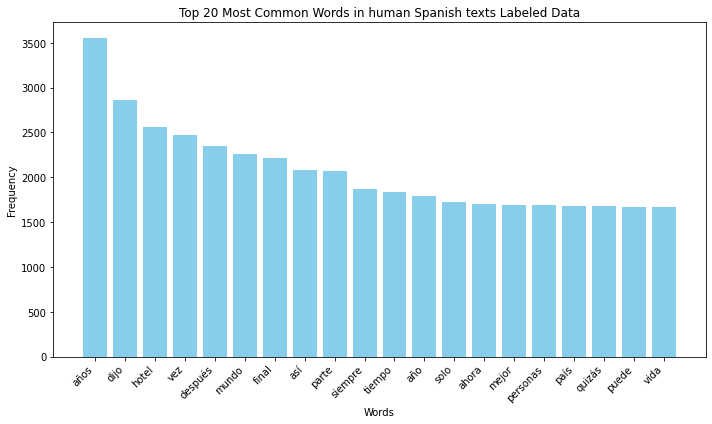

[('hotel', 3287), ('mundo', 2930), ('embargo', 2879), ('vida', 2871), ('ciudad', 2863), ('además', 2691), ('puede', 2547), ('siempre', 2480), ('años', 2452), ('momento', 2399), ('gran', 2369), ('mientras', 2357), ('lugar', 2239), ('vez', 2136), ('personal', 2112), ('solo', 2107), ('historia', 2034), ('país', 2013), ('después', 1964), ('parte', 1955), ('aunque', 1911), ('día', 1834), ('dijo', 1824), ('pesar', 1787), ('tiempo', 1786), ('personas', 1765), ('habitación', 1703), ('importante', 1688), ('podía', 1654), ('así', 1593), ('ahora', 1479), ('gobierno', 1450), ('hombre', 1443), ('unidos', 1425), ('cuenta', 1424), ('cómo', 1414), ('encuentra', 1402), ('hacia', 1397), ('hacer', 1351), ('pueden', 1336), ('amable', 1315), ('casa', 1290), ('trabajo', 1272), ('región', 1269), ('familia', 1252), ('según', 1182), ('forma', 1165), ('año', 1164), ('ojos', 1152), ('carrera', 1130)]


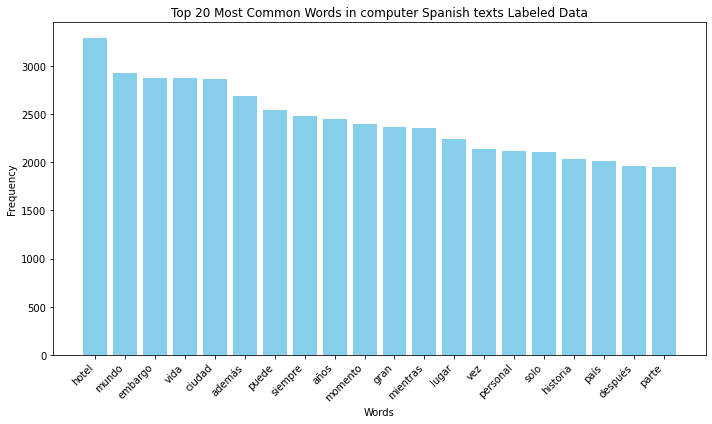

[('disse', 3506), ('ainda', 2963), ('anos', 2791), ('dois', 1993), ('segundo', 1938), ('brasil', 1932), ('dia', 1885), ('casa', 1884), ('bem', 1818), ('país', 1756), ('onde', 1726), ('tempo', 1719), ('pessoas', 1667), ('governo', 1637), ('vez', 1621), ('então', 1517), ('ano', 1506), ('agora', 1459), ('parte', 1443), ('grande', 1416), ('cidade', 1399), ('vida', 1387), ('presidente', 1370), ('outros', 1365), ('tudo', 1365), ('mundo', 1323), ('pouco', 1305), ('tão', 1295), ('assim', 1284), ('unidos', 1283), ('dias', 1272), ('primeiro', 1264), ('produto', 1261), ('três', 1257), ('apenas', 1237), ('outro', 1231), ('menos', 1215), ('duas', 1210), ('homem', 1203), ('primeira', 1189), ('diz', 1180), ('fim', 1179), ('fazer', 1135), ('olhos', 1119), ('mil', 1095), ('após', 1052), ('ver', 1030), ('sempre', 1027), ('maior', 1020), ('vai', 1014)]


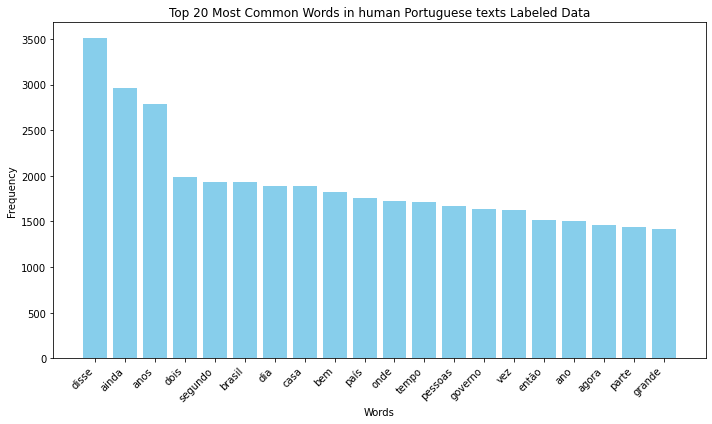

[('anys', 1721), ('catalunya', 1575), ('segons', 1560), ('persones', 1477), ('cap', 1386), ('govern', 1378), ('sha', 1306), ('barcelona', 1296), ('part', 1177), ('referències', 1126), ('fet', 1112), ('duna', 1103), ('lany', 1085), ('població', 1058), ('té', 983), ('gran', 950), ('president', 906), ('fou', 897), ('tres', 861), ('ciutat', 832), ('pot', 793), ('lestat', 789), ('dues', 780), ('ara', 750), ('família', 717), ('espanyol', 708), ('primera', 694), ('sant', 678), ('nou', 627), ('nom', 610), ('generalitat', 608), ('grup', 597), ('nova', 597), ('habitatges', 597), ('dia', 583), ('lloc', 578), ('tenia', 574), ('dones', 570), ('passat', 563), ('dit', 557), ('banda', 554), ('daquest', 554), ('forma', 546), ('general', 541), ('davant', 536), ('manera', 531), ('cas', 526), ('quatre', 509), ('temps', 501), ('municipi', 498)]


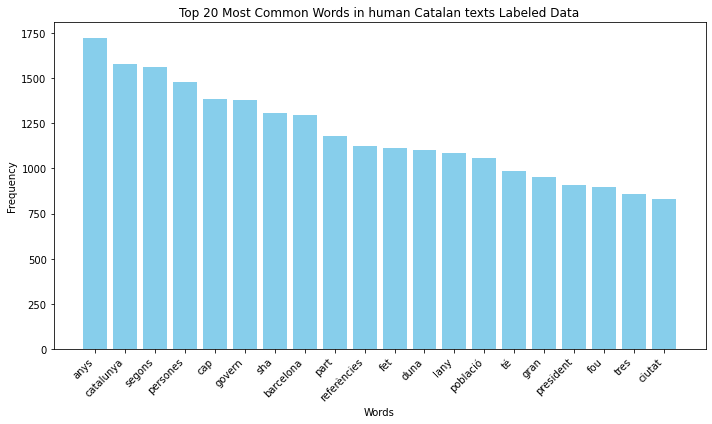

[('catalunya', 2593), ('gran', 2513), ('ara', 2277), ('govern', 2225), ('vida', 2204), ('té', 1922), ('ciutat', 1906), ('barcelona', 1731), ('cap', 1661), ('part', 1478), ('segons', 1456), ('món', 1423), ('pot', 1378), ('català', 1355), ('fet', 1351), ('sha', 1344), ('anys', 1306), ('temps', 1269), ('lloc', 1264), ('història', 1256), ('poble', 1150), ('president', 1125), ('nit', 1097), ('catalana', 1050), ('duna', 1046), ('dia', 1043), ('cor', 1027), ('persones', 1014), ('sempre', 982), ('lany', 938), ('partit', 920), ('diverses', 916), ('diferents', 899), ('important', 883), ('terra', 878), ('generalitat', 861), ('zona', 845), ('situació', 837), ('mai', 829), ('amor', 829), ('dir', 827), ('segle', 814), ('troba', 811), ('sol', 800), ('política', 785), ('moment', 785), ('sant', 772), ('diversos', 771), ('seguretat', 771), ('cel', 747)]


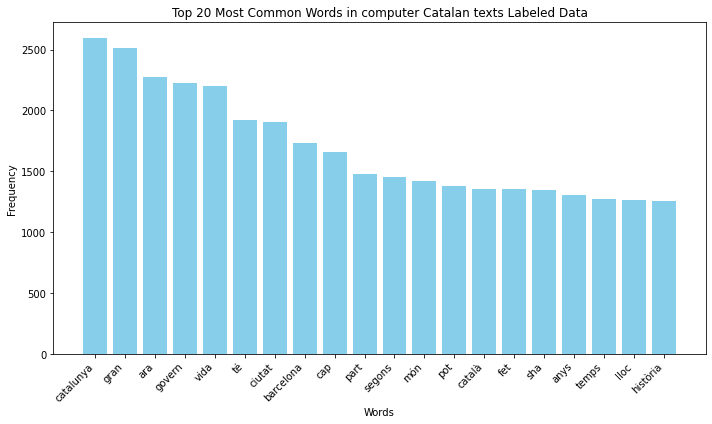

[('zeuden', 2087), ('egiten', 1743), ('bi', 1621), ('izango', 1587), ('behar', 1562), ('nahi', 1507), ('zituzten', 1459), ('kanpo', 1267), ('dut', 1151), ('estekak', 1151), ('zion', 1118), ('euskal', 1096), ('duen', 1070), ('ari', 1064), ('oso', 1019), ('pertsona', 1010), ('gainera', 972), ('gehiago', 954), ('nire', 949), ('etxek', 903), ('bizi', 902), ('hartu', 897), ('zegoen', 883), ('eman', 850), ('urte', 848), ('hiru', 847), ('etxebizitza', 830), ('diren', 825), ('gure', 802), ('zela', 800), ('lan', 787), ('joan', 775), ('duten', 744), ('egiteko', 735), ('bakarrik', 724), ('2007an', 711), ('azken', 694), ('nuen', 675), ('gizon', 667), ('erreferentziak', 657), ('dugu', 649), ('ezin', 648), ('1', 646), ('bertan', 623), ('bigarren', 608), ('hainbat', 607), ('biztanle', 606), ('emakume', 592), ('dituzten', 584), ('zuela', 582)]


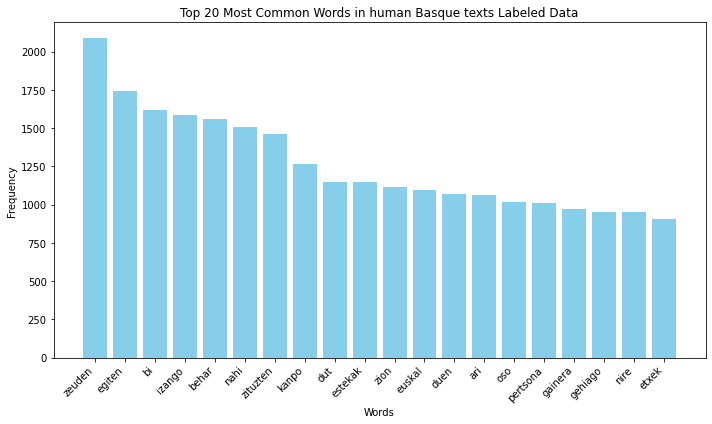

[('gure', 4552), ('euskal', 4353), ('izango', 3810), ('duen', 2873), ('nire', 2713), ('behar', 2597), ('egiten', 2378), ('hainbat', 2288), ('nahi', 2277), ('duzu', 2079), ('ezagutzen', 2051), ('oso', 1940), ('eman', 1794), ('dugu', 1672), ('dut', 1667), ('bilboko', 1662), ('bi', 1652), ('daude', 1617), ('duten', 1587), ('gehiago', 1529), ('zehar', 1413), ('ezin', 1412), ('aukera', 1399), ('herriko', 1398), ('bertan', 1376), ('dituen', 1298), ('dituzte', 1282), ('ematen', 1233), ('azken', 1204), ('euskara', 1201), ('dakit', 1162), ('buruzko', 1121), ('diren', 1066), ('gora', 1048), ('zure', 1042), ('lan', 1041), ('parte', 1023), ('hartu', 1004), ('beti', 908), ('izena', 894), ('kultura', 892), ('handia', 887), ('ahal', 887), ('bakarrik', 884), ('arteko', 882), ('hiru', 881), ('dagoen', 873), ('nuen', 869), ('ari', 868), ('eusko', 864)]


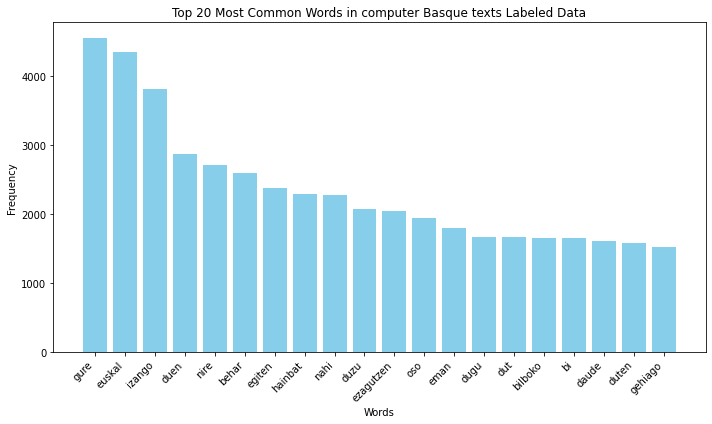

[('máis', 4089), ('súa', 3783), ('tamén', 3152), ('á', 3140), ('ano', 1499), ('lugares', 1496), ('concello', 1445), ('xa', 1369), ('anos', 1329), ('lugar', 1193), ('galicia', 1183), ('ás', 1151), ('parte', 1074), ('parroquias', 1038), ('así', 1020), ('onde', 1002), ('outros', 971), ('súas', 952), ('segundo', 950), ('galego', 939), ('véxase', 925), ('aínda', 907), ('notas', 880), ('ata', 854), ('parroquia', 850), ('despois', 801), ('dende', 792), ('sen', 784), ('ó', 776), ('primeira', 760), ('dous', 756), ('cidade', 753), ('día', 734), ('historia', 731), ('primeiro', 725), ('nome', 681), ('dúas', 672), ('persoas', 669), ('gran', 646), ('tiña', 640), ('habitantes', 626), ('vez', 626), ('tres', 616), ('grupo', 616), ('ademais', 589), ('forma', 579), ('mundo', 572), ('ligazóns', 561), ('externas', 543), ('traballo', 537)]


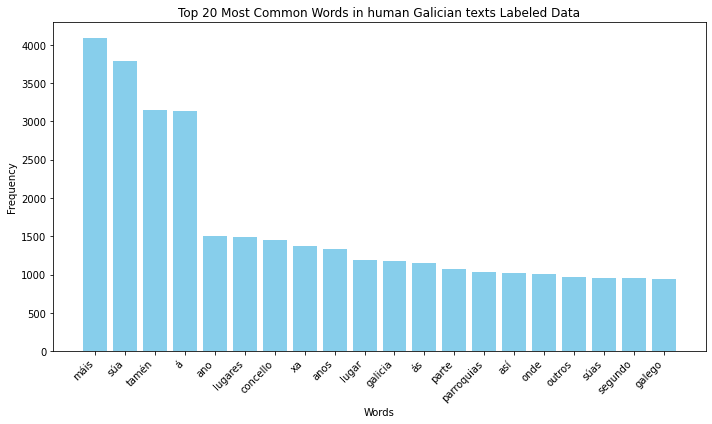

[('súa', 7104), ('máis', 5208), ('tamén', 3612), ('á', 3065), ('galicia', 2396), ('historia', 1733), ('vida', 1729), ('súas', 1580), ('ademais', 1546), ('onde', 1505), ('lugar', 1500), ('galega', 1478), ('concello', 1413), ('así', 1384), ('sen', 1364), ('xa', 1286), ('parroquia', 1257), ('galego', 1216), ('día', 1180), ('cultura', 1178), ('mundo', 1174), ('ano', 1172), ('cidade', 1171), ('importante', 1164), ('parte', 1151), ('gran', 1144), ('ás', 1129), ('anos', 1105), ('aínda', 1036), ('traballo', 1024), ('nova', 946), ('tempo', 932), ('sempre', 930), ('senón', 895), ('século', 892), ('zona', 832), ('san', 828), ('mar', 802), ('provincia', 792), ('desta', 785), ('segundo', 784), ('música', 764), ('diferentes', 761), ('forma', 757), ('cultural', 756), ('amor', 753), ('persoas', 751), ('nome', 739), ('obra', 736), ('ata', 712)]


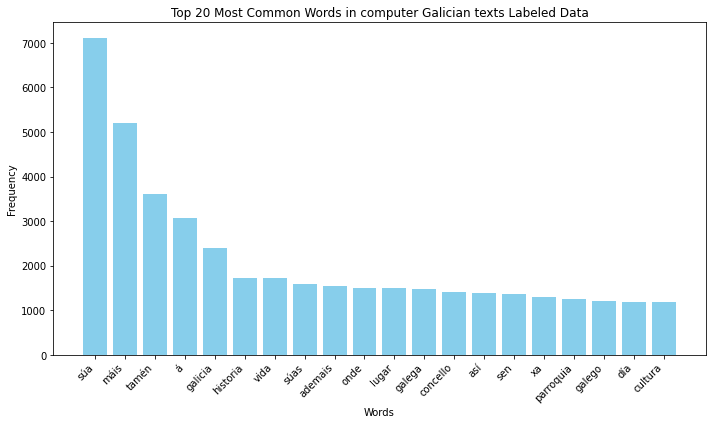

[('said', 10433), ('one', 5476), ('would', 5368), ('parte', 5070), ('vez', 4719), ('casa', 4308), ('país', 4292), ('mundo', 4182), ('anos', 4140), ('máis', 4108), ('mr', 4026), ('vida', 3943), ('súa', 3814), ('final', 3639), ('also', 3597), ('años', 3564), ('1', 3561), ('people', 3533), ('disse', 3507), ('segundo', 3443), ('á', 3426), ('lugar', 3409), ('new', 3384), ('first', 3296), ('time', 3274), ('gran', 3265), ('tamén', 3243), ('2', 3147), ('así', 3100), ('unidos', 3079), ('ano', 3035), ('forma', 3017), ('ainda', 2999), ('could', 2992), ('bbc', 2922), ('presidente', 2921), ('like', 2921), ('hotel', 2918), ('tres', 2879), ('menos', 2871), ('dijo', 2859), ('two', 2775), ('onde', 2737), ('dia', 2624), ('3', 2605), ('part', 2563), ('grupo', 2524), ('10', 2523), ('ver', 2473), ('brasil', 2456)]


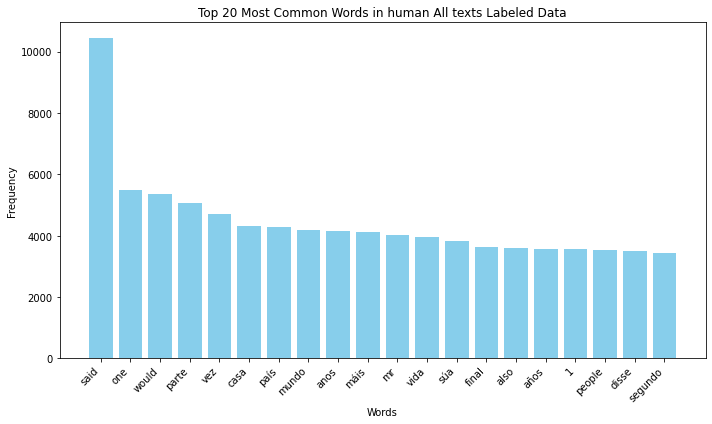

[('vida', 9985), ('also', 9598), ('said', 7413), ('súa', 7216), ('mundo', 6417), ('one', 6188), ('gran', 6056), ('would', 5735), ('país', 5575), ('máis', 5324), ('parte', 5239), ('new', 5026), ('local', 4763), ('lugar', 4642), ('vez', 4632), ('gure', 4583), ('euskal', 4391), ('historia', 4369), ('time', 4356), ('importante', 4294), ('could', 4257), ('momento', 4229), ('cidade', 4077), ('ainda', 3982), ('sempre', 3874), ('izango', 3849), ('onde', 3788), ('casa', 3741), ('hotel', 3714), ('forma', 3711), ('including', 3662), ('tamén', 3637), ('made', 3612), ('people', 3603), ('many', 3461), ('man', 3388), ('life', 3363), ('help', 3362), ('like', 3359), ('part', 3313), ('known', 3289), ('however', 3282), ('world', 3232), ('amor', 3159), ('first', 3152), ('anos', 3144), ('cultura', 3110), ('á', 3084), ('día', 3048), ('work', 3037)]


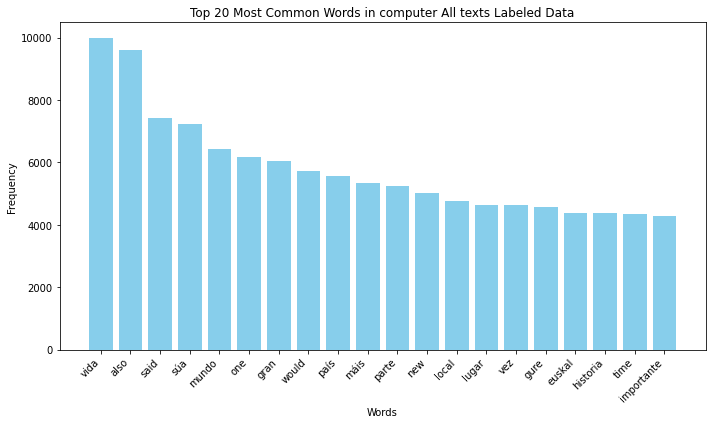

In [31]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

for train_data, lan in train:
    plot_common_words(train_data, 'human', lan)
    plot_common_words(train_data, 'computer', lan)


## Validation

In [3]:
def train_test(corpus, test):
    x_train, x_test, y_train, y_test = train_test_split(corpus.loc[:'clean_text'],
                                                       corpus['label'], test_size=test, random_state=42)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)
          
    return x_train['clean_text'], x_test['clean_text'], y_train, y_test

In [8]:
x_train_en, x_test_en, y_train_en, y_test_en = train_test(train_en_preprocessed, 0.2)
x_train_es, x_test_es, y_train_es, y_test_es = train_test(train_es_preprocessed, 0.2)
x_train_ca, x_test_ca, y_train_ca, y_test_ca = train_test(train_ca_preprocessed, 0.2)
x_train_eu, x_test_eu, y_train_eu, y_test_eu = train_test(train_eu_preprocessed, 0.2)
x_train_gl, x_test_gl, y_train_gl, y_test_gl = train_test(train_gl_preprocessed, 0.2)
x_train_pt, x_test_pt, y_train_pt, y_test_pt = train_test(train_pt_preprocessed, 0.2)


(20763, 5)
(5191, 5)
(20763,)
(5191,)
(18028, 5)
(4507, 5)
(18028,)
(4507,)
(13097, 5)
(3275, 5)
(13097,)
(3275,)
(10755, 5)
(2689, 5)
(10755,)
(2689,)
(9300, 5)
(2325, 5)
(9300,)
(2325,)
(15786, 5)
(3947, 5)
(15786,)
(3947,)


In [4]:
x_train, x_test, y_train, y_test = train_test(train_preprocessed, 0.2)
x_train

(87730, 5)
(21933, 5)
(87730,)
(21933,)


57131     sant blai dalgerri germà parròquia lalta garro...
19051     sangin sniper collective name several snipers ...
13009     kremlin ruso кремль kreml cidadela fortificada...
90218     shin dongyup nascido 17 fevereiro 1971 comedia...
104538    línea 171 puede referirse línea 171 emt madrid...
                                ...                        
54886     n egg full meat yet thy head hath beaten addle...
76820     begonia sect platycentrum sección género begon...
103694    gafotas tommyhilfiger glasses gafapasta selfie...
860       imágenes personas situaciones difíciles domina...
15795     casa consistorial miranda ebro edificio encuen...
Name: clean_text, Length: 87730, dtype: object

## Minable view

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


# Bag of Words

vect = CountVectorizer()

# Bag of Words (Term-frequency)
## Represent the text considering the term frequency of words
### considering the frequency of the terms (binary=False), and removing stopwords (stop_words="english")

term_frequency = CountVectorizer(binary=False)


# Bigrams of Words (Term-Frequency)
## Represent the text considering the frequency of pairs of adjacent words.
### considering the frequency of the bigrams of words (binary=False), and removing stopwords (stop_words="english")

two_gram_tf = CountVectorizer(analyzer='word', ngram_range=(2,2), binary=False)




In [ ]:
def text_representations(train_corpus, test_corpus, model):
    # learn training data vocabulary, then use it to create a document-term matrix
    x_train_tr = model.fit_transform(train_corpus)
    
    # examine the document-term matrix
    print(type(x_train_tr), x_train_tr.shape)
    
    # transform testing data (using fitted vocabulary) into a document-term matrix
    x_test_tr = model.transform(test_corpus)
    
    print(type(x_test_tr), x_test_tr.shape)
    
    return x_train_tr, x_test_tr

In [ ]:
x_train_v, x_test_v = text_representations(x_train, x_test, vect)

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer

# tfidf_transformer = TfidfTransformer()
# tfidf_transformer.fit(X_train1_dtm)
# tfidf_transformer.transform(X_train1_dtm)

In [ ]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

pipe = Pipeline([('count', CountVectorizer(stop_words="english", binary=False)), ('tfid', TfidfTransformer(use_idf=True))])
x_train_tfidf=pipe.fit_transform(x_train).toarray()
x_test_tfidf = vect.transform(x_test)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_eu_tfidf = vectorizer.fit_transform(x_train_eu)
x_test_eu_tfidf = vectorizer.transform(x_test_eu)

## Models and evaluation

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

### Naive bayes

In [ ]:
# train the model using X_train1_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train1_dtm, y_train_en)

#### Evaluation

In [ ]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_test_en_pred_mb = nb.predict(X_test1_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_mb))

# print the confusion matrix
print("=======Confusion Matrix===========")
metrics.confusion_matrix(y_test_en, y_test_en_pred_mb)

In [ ]:
from sklearn.metrics import f1_score
print(f"F1-score for Naive Bayes model: {f1_score(y_test_en, y_test_en_pred_mb, average='macro')}")

### Logistic regresion

In [ ]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train1_dtm, y_train_en)

#### Evaluation

In [ ]:
# make class predictions for X_test_dtm
y_test_en_pred_lr = logreg.predict(X_test1_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_test_en_prob_lr = logreg.predict_proba(X_test1_dtm)[:, 1]
y_test_en_prob_lr

In [ ]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test_en, y_test_en_pred_lr))

# print the confusion matrix
print("=======Confusion Matrix===========")
print(metrics.confusion_matrix(y_test_en, y_test_en_pred_lr))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test_en, y_test_en_pred_lr))

In [ ]:
from sklearn.metrics import f1_score
print(f"F1-score for Logistic Regression model: {f1_score(y_test_en, y_test_en_pred_lr, average='macro')}")